Поиск и выбор набора данных для построения моделей машинного обучения.

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
%matplotlib inline 
sns.set(style="ticks")

In [14]:
data = pd.read_csv('diamonds.csv', encoding='cp1251', sep=',') 

Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

In [15]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [16]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
data = data.sample(n=500)
data = data.drop(data.columns[0], axis=1)
# Применяем Label Encoding к категориальным признакам
data['cut'] = le.fit_transform(data['cut'])
data['color'] = le.fit_transform(data['color'])
data['clarity'] = le.fit_transform(data['clarity'])

In [18]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
51431,0.70,3,2,3,62.5,60.0,2373,5.66,5.61,3.52
12368,0.26,4,1,6,59.9,58.0,597,4.17,4.18,2.50
38149,0.54,3,5,3,61.2,60.0,1013,5.22,5.20,3.19
34100,0.43,4,3,5,62.4,56.0,852,4.84,4.87,3.02
29277,0.31,3,5,7,61.7,58.0,698,4.40,4.38,2.71


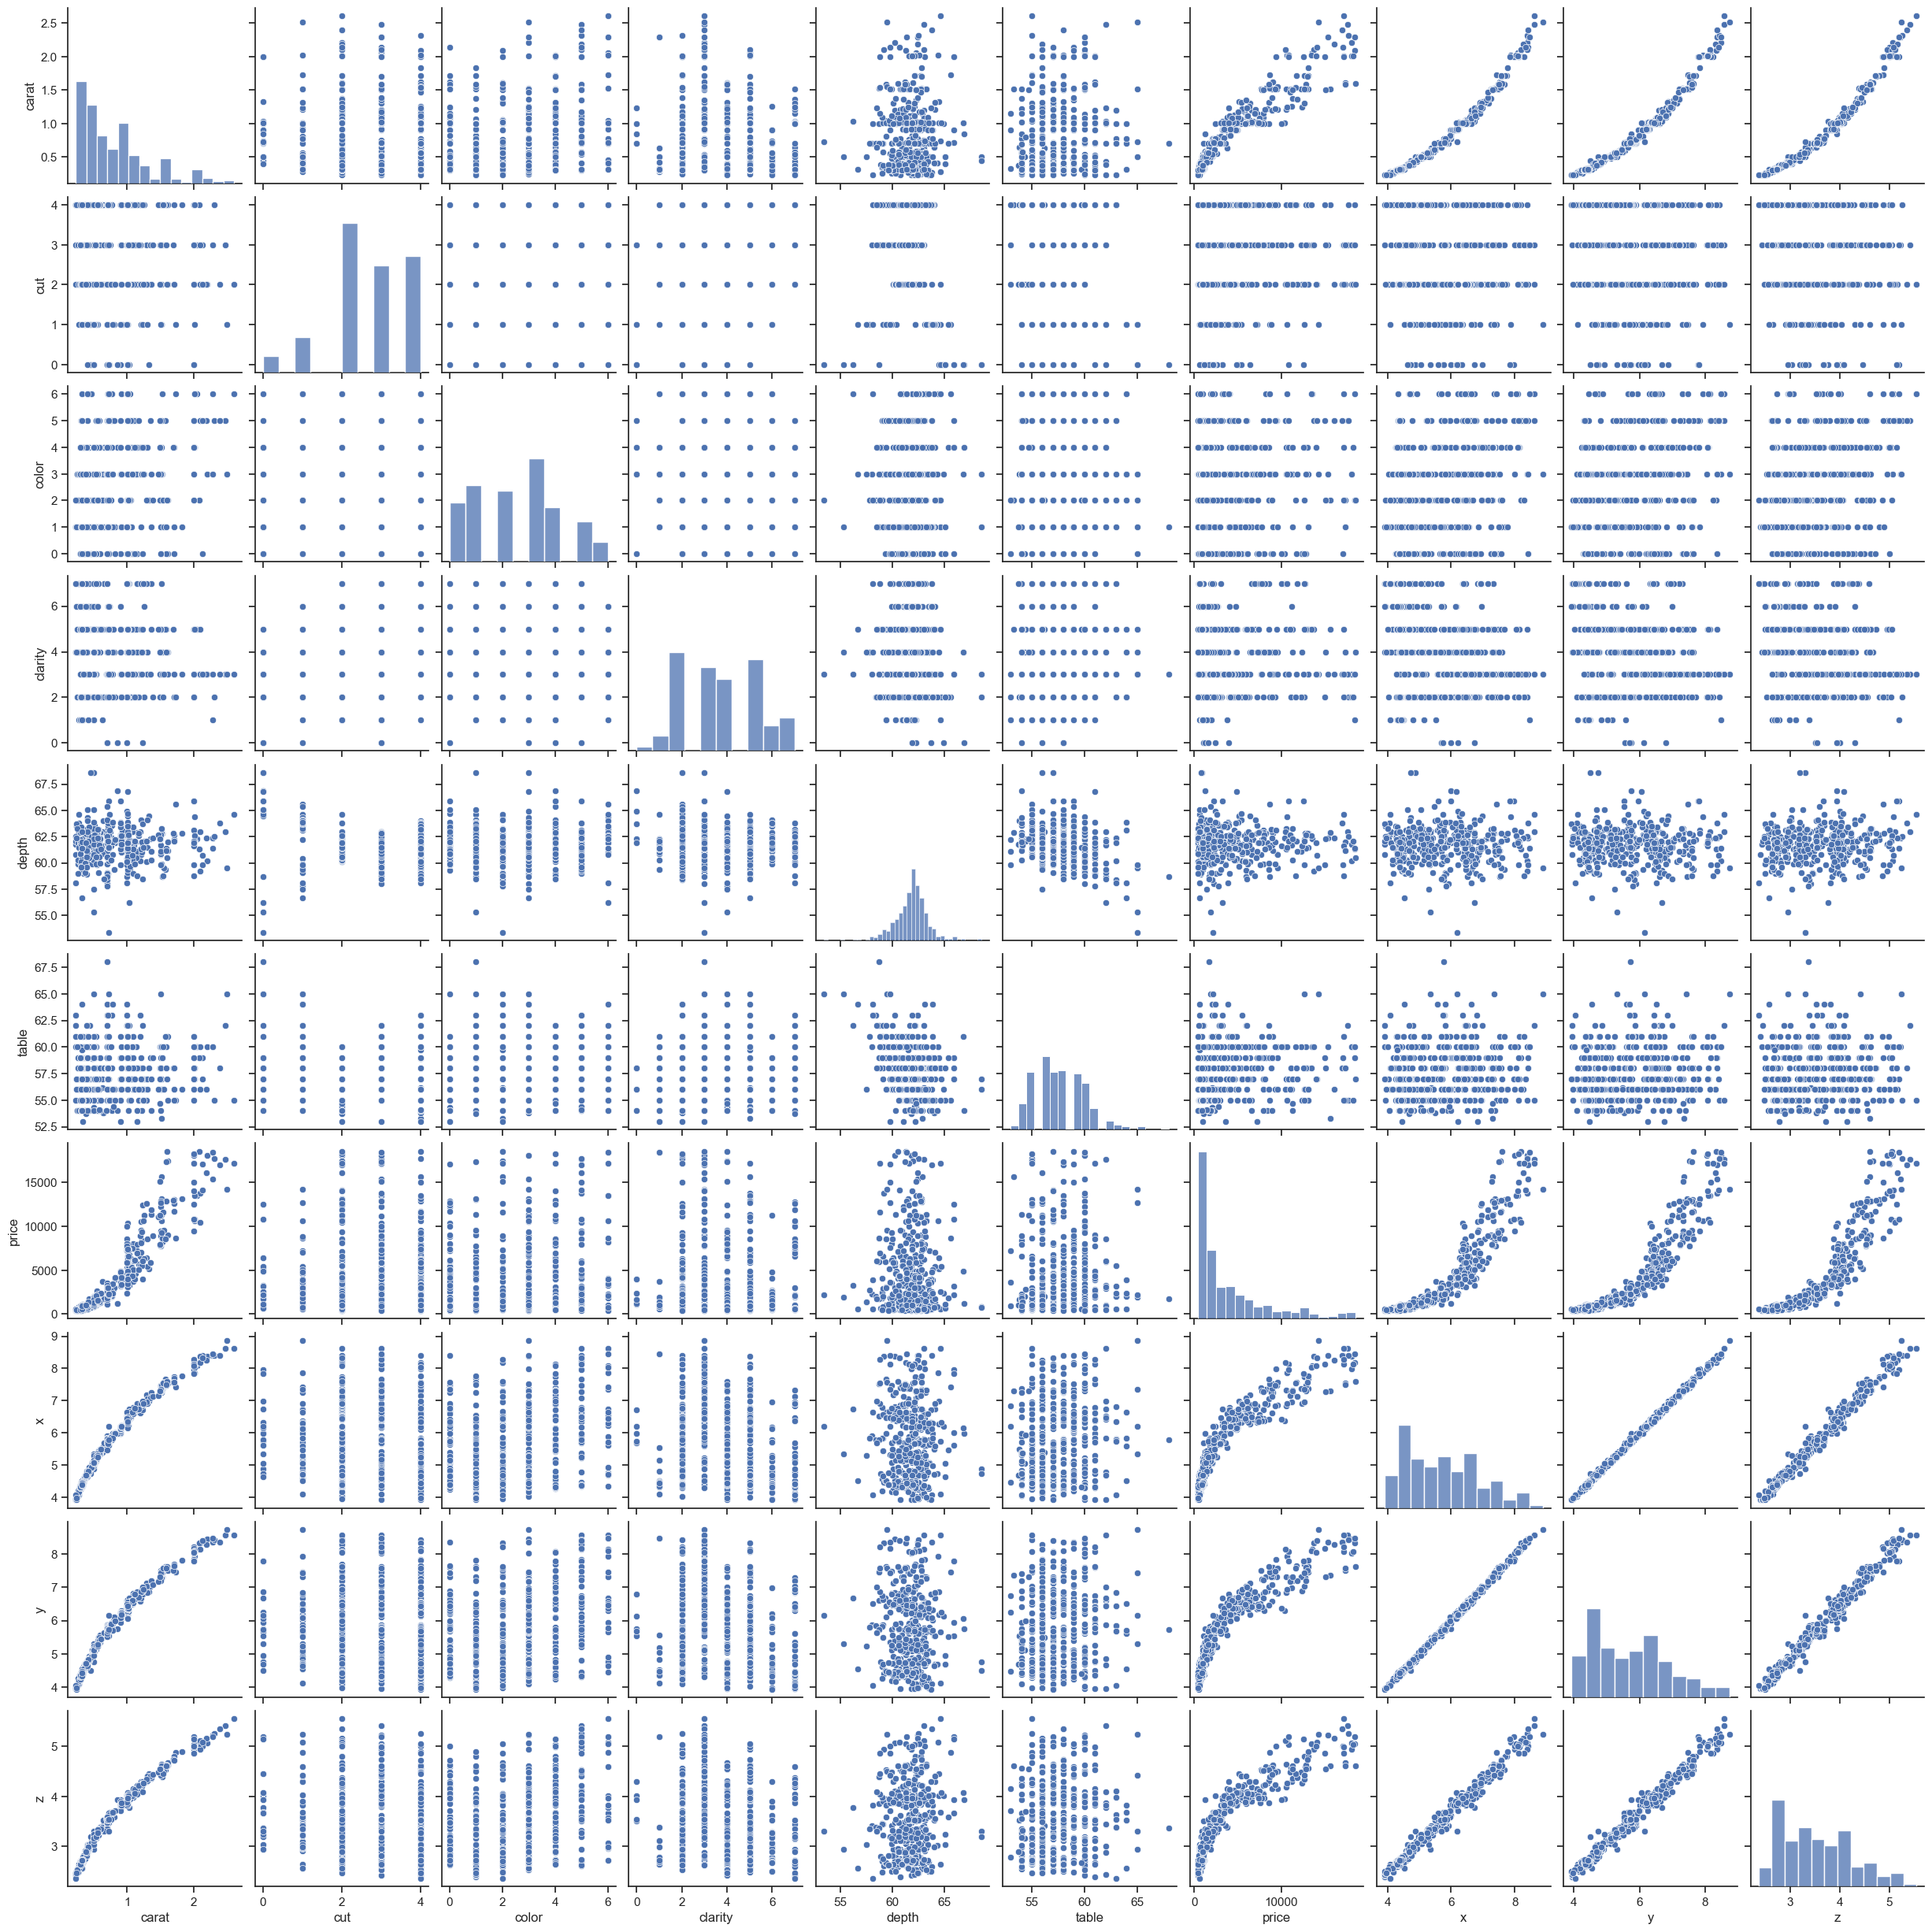

In [19]:
sns.pairplot(data)

Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [20]:
scale_cols = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price','x','y','z']

In [21]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [22]:
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

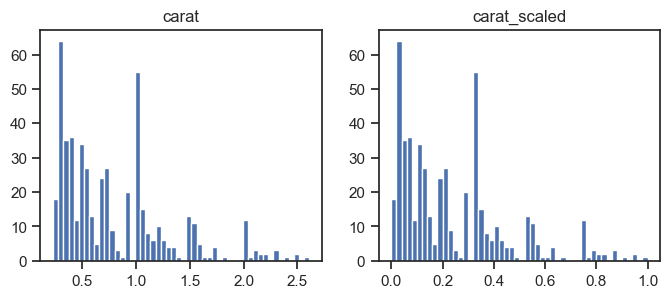

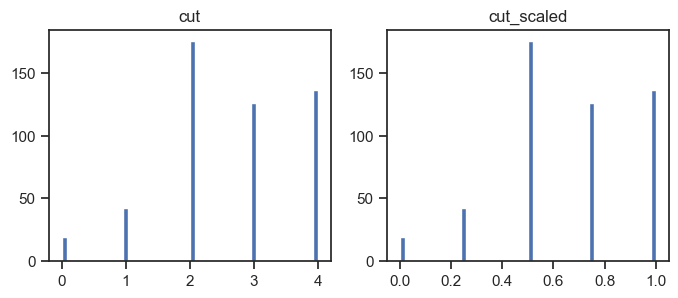

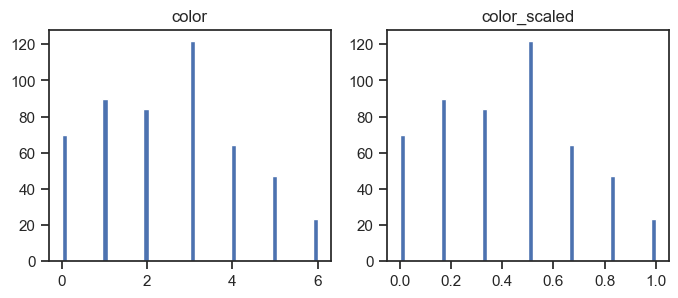

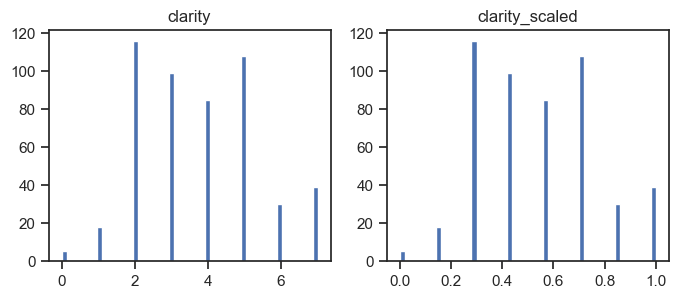

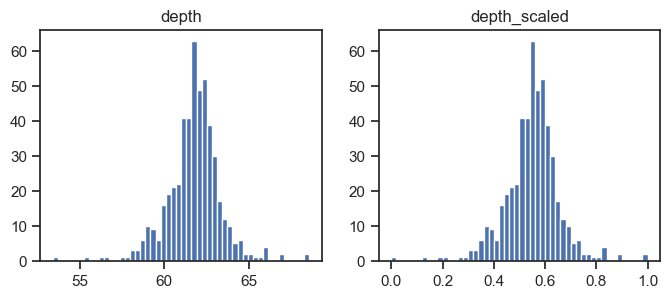

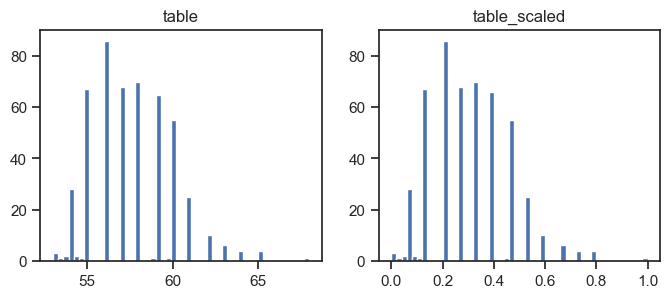

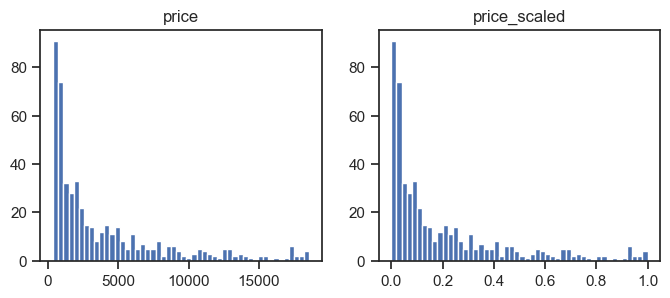

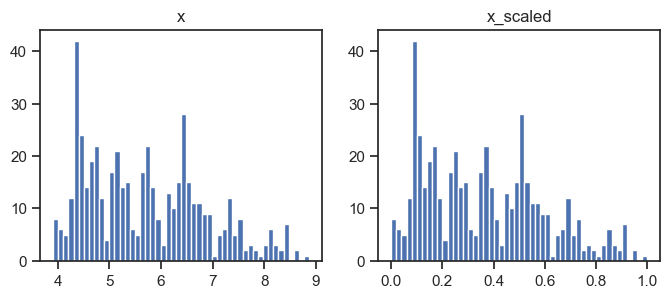

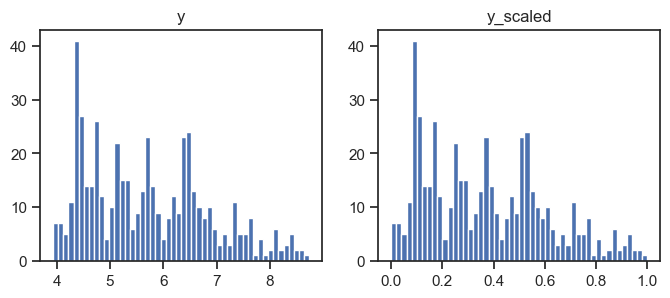

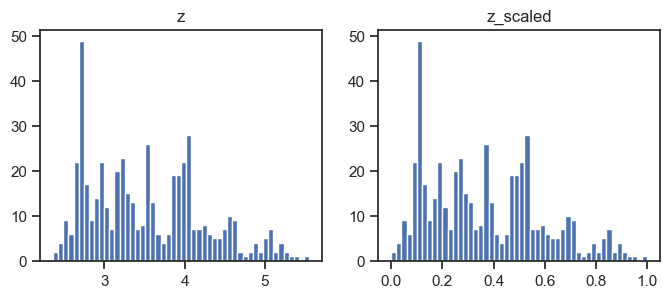

In [23]:
scale_cols = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price','x','y','z']
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

<Axes: >

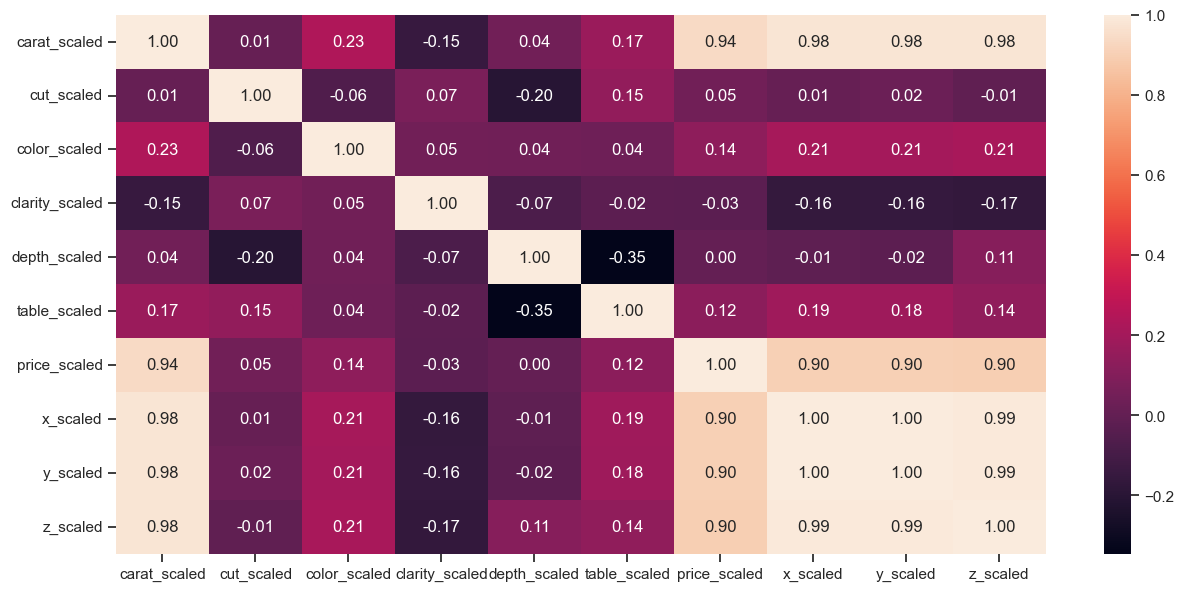

In [24]:
data = data.drop(scale_cols, axis=1)
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

Целевой признак классификации "price" наиболее сильно коррелирует с carat(0.91), x(0.87), y(0.87), z(0.86). На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения.

Выбор метрик для последующей оценки качества моделей.

Mean absolute error - средняя абсолютная ошибка
Mean squared error - средняя квадратичная ошибка
R2 - коэффициент детерминации

Выбор наиболее подходящих моделей для решения задачи регрессии.

Линейная регрессия
Метод ближайших соседей
Метод опорных векторов
Решающее дерево
Случайный лес
Градиентный бустинг

Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [25]:
data_dict = {"carat_scaled": data['carat_scaled'], "x_scaled": data['x_scaled'], "y_scaled": data['y_scaled'], "z_scaled": data['z_scaled']}
df_scaled = pd.DataFrame(data_dict)
X_train, X_test, y_train, y_test = train_test_split(df_scaled, data['price_scaled'], random_state=1)

In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((375, 4), (375,), (125, 4), (125,))

Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [27]:
regr_models = {'LR': LinearRegression(), 
               'KNN_5':KNeighborsRegressor(n_neighbors=5),
               'SVR':SVR(),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

In [28]:
regrMetricLogger = pd.DataFrame(columns=['ModelName', 'MetricName', 'Value'])

In [29]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, Y_pred)
    mse = mean_squared_error(y_test, Y_pred)
    r2 = r2_score(y_test, Y_pred)

    regrMetricLogger.loc[len(regrMetricLogger)] = [model_name, 'MAE', mae]
    regrMetricLogger.loc[len(regrMetricLogger)] = [model_name, 'MSE', mse]
    regrMetricLogger.loc[len(regrMetricLogger)] = [model_name, 'R2', r2]
   
    print('{} \t MAE={}, MSE={}, R2={}'.format(
        model_name, round(mae, 3), round(mse, 3), round(r2, 3)))

In [30]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

LR 	 MAE=0.049, MSE=0.006, R2=0.904
KNN_5 	 MAE=0.05, MSE=0.007, R2=0.882
SVR 	 MAE=0.075, MSE=0.008, R2=0.868
Tree 	 MAE=0.056, MSE=0.009, R2=0.847
RF 	 MAE=0.05, MSE=0.006, R2=0.889
GB 	 MAE=0.051, MSE=0.007, R2=0.878


Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

In [32]:
n_range = np.array(range(1,100,10))
tuned_parameters = [{'n_neighbors': n_range}]
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs.fit(X_train, y_train)
regr_gs.best_estimator_

KNeighborsRegressor(n_neighbors=np.int64(11))

In [33]:
regr_gs.best_params_

{'n_neighbors': np.int64(11)}

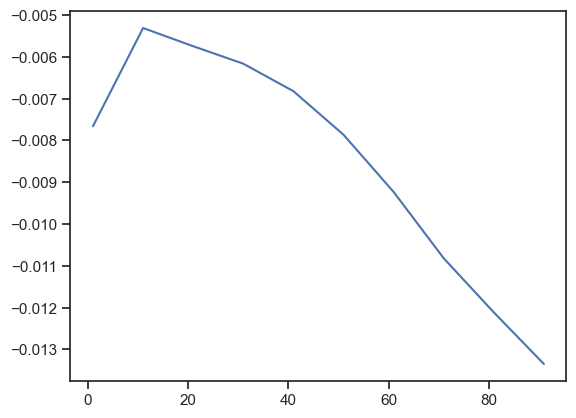

In [34]:
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import matplotlib.pyplot as plt
def train_and_evaluate_model(model_name, model, param_grid, X_train, y_train, X_test, y_test):
    """
    Обучает модель с использованием GridSearchCV и оценивает ее на тестовых данных.

    Args:
        model_name (str): Имя модели для вывода.
        model: Класс модели.
        param_grid (dict): Параметры для GridSearchCV.
        X_train (pd.DataFrame): Данные обучения.
        y_train (pd.Series): Целевые значения обучения.
        X_test (pd.DataFrame): Данные тестирования.
        y_test (pd.Series): Целевые значения тестирования.

    Returns:
        tuple: Лучшие параметры, обученная модель, MAE, MSE, R2.
    """

    grid_search = GridSearchCV(estimator=model(), param_grid=param_grid, scoring="r2", cv=5)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    Y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, Y_pred)
    mse = mean_squared_error(y_test, Y_pred)
    r2 = r2_score(y_test, Y_pred)

    print(f"Best Model ({model_name}) \t MAE={round(mae, 3)}, MSE={round(mse, 3)}, R2={round(r2, 3)}")

    return best_params, best_model, mae, mse, r2
param_grid_knn = {"n_neighbors": range(3, 35), "weights": ["uniform", "distance"]}
param_grid_rf = {"n_estimators": [50, 100, 200], "max_depth": [5, 10, 15], "max_features": ["sqrt", "log2"]}
param_grid_svr = {"kernel": ["linear", "poly", "rbf"], "C": [0.1, 1, 10], "epsilon": [0.01, 0.1, 1]}
param_grid_tree = {"max_depth": range(3, 11), "min_samples_leaf": range(2, 11), "criterion": ["squared_error", "friedman_mse", "absolute_error"]}
param_grid_gb = {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1], "max_depth": [3, 5, 7], "subsample": [0.5, 0.75, 1]}

# Обучение и оценка моделей
models = [
    ("LinearRegression", LinearRegression, {}),
    ("KNN", KNeighborsRegressor, {"n_neighbors": range(3, 35), "weights": ["uniform", "distance"]}),
    ("SVR", SVR, {"kernel": ["linear", "poly", "rbf"], "C": [0.1, 1, 10], "epsilon": [0.01, 0.1, 1]}),
    ("DecisionTreeRegressor", DecisionTreeRegressor, {"max_depth": range(3, 11), "min_samples_leaf": range(2, 11), "criterion": ["squared_error", "friedman_mse", "absolute_error"]}),
    ("RandomForestRegressor", RandomForestRegressor, {"n_estimators": [50, 100, 200], "max_depth": [5, 10, 15], "max_features": ["sqrt", "log2"]}),
    ("GradientBoostingRegressor", GradientBoostingRegressor, {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1], "max_depth": [3, 5, 7], "subsample": [0.5, 0.75, 1]})
]

# Сохранение метрик для каждой модели
mae_lr, mse_lr, r2_lr = None, None, None
mae_knn, mse_knn, r2_knn = None, None, None
mae_svr, mse_svr, r2_svr = None, None, None
mae_tree, mse_tree, r2_tree = None, None, None
mae_rf, mse_rf, r2_rf = None, None, None
mae_gb, mse_gb, r2_gb = None, None, None

for model_name, model_class, param_grid in models:
    best_params, best_model, mae, mse, r2 = train_and_evaluate_model(model_name, model_class, param_grid, X_train, y_train, X_test, y_test)

    # Сохранение метрик в соответствующие переменные
    if model_name == "LinearRegression":
        mae_lr, mse_lr, r2_lr = mae, mse, r2
    elif model_name == "KNN":
        mae_knn, mse_knn, r2_knn = mae, mse, r2
    elif model_name == "SVR":
        mae_svr, mse_svr, r2_svr = mae, mse, r2
    elif model_name == "DecisionTreeRegressor":
        mae_tree, mse_tree, r2_tree = mae, mse, r2
    elif model_name == "RandomForestRegressor":
        mae_rf, mse_rf, r2_rf = mae, mse, r2
    elif model_name == "GradientBoostingRegressor":
        mae_gb, mse_gb, r2_gb = mae, mse, r2

# Создание DataFrame с метриками для лучших моделей
best_models_metrics = pd.DataFrame(
    {
        "Model": [
            "LinearRegression",
            "KNN",
            "SVR",
            "DecisionTreeRegressor",
            "RandomForestRegressor",
            "GradientBoostingRegressor",
        ],
        "MAE": [mae_lr, mae_knn, mae_svr, mae_tree, mae_rf, mae_gb],
        "MSE": [mse_lr, mse_knn, mse_svr, mse_tree, mse_rf, mse_gb],
        "R2": [r2_lr, r2_knn, r2_svr, r2_tree, r2_rf, r2_gb],
    }
)
best_models_metrics = best_models_metrics.melt(
    id_vars="Model", var_name="Metric", value_name="Value"
)

Best Model (LinearRegression) 	 MAE=0.049, MSE=0.006, R2=0.904
Best Model (KNN) 	 MAE=0.048, MSE=0.006, R2=0.891
Best Model (SVR) 	 MAE=0.044, MSE=0.005, R2=0.914
Best Model (DecisionTreeRegressor) 	 MAE=0.056, MSE=0.008, R2=0.859
Best Model (RandomForestRegressor) 	 MAE=0.05, MSE=0.007, R2=0.887
Best Model (GradientBoostingRegressor) 	 MAE=0.049, MSE=0.006, R2=0.89


In [36]:
regr_train_model('LR',LinearRegression(), regrMetricLogger)
regr_train_model('KNN',KNeighborsRegressor(), regrMetricLogger)
regr_train_model('SVR',SVR(), regrMetricLogger)
regr_train_model('RF',RandomForestRegressor(), regrMetricLogger)
regr_train_model('Tree',DecisionTreeRegressor(), regrMetricLogger)
regr_train_model('GB',GradientBoostingRegressor(), regrMetricLogger)

LR 	 MAE=0.049, MSE=0.006, R2=0.904
KNN 	 MAE=0.05, MSE=0.007, R2=0.882
SVR 	 MAE=0.075, MSE=0.008, R2=0.868
RF 	 MAE=0.05, MSE=0.007, R2=0.887
Tree 	 MAE=0.057, MSE=0.008, R2=0.855
GB 	 MAE=0.052, MSE=0.007, R2=0.872


Подбор гиперпараметров помог незначительно улучшить модели

Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

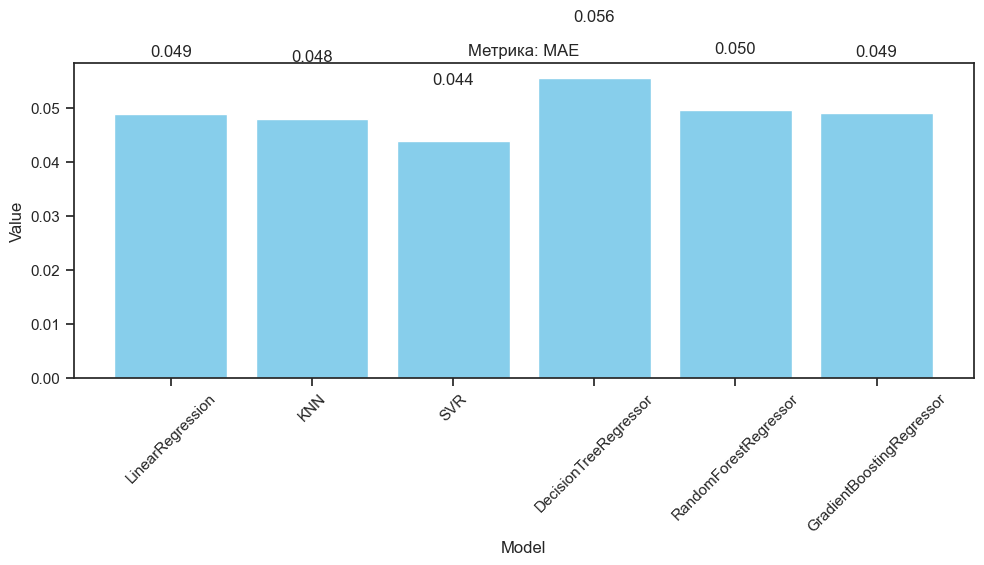

D:\Temp\ipykernel_292\2999699530.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


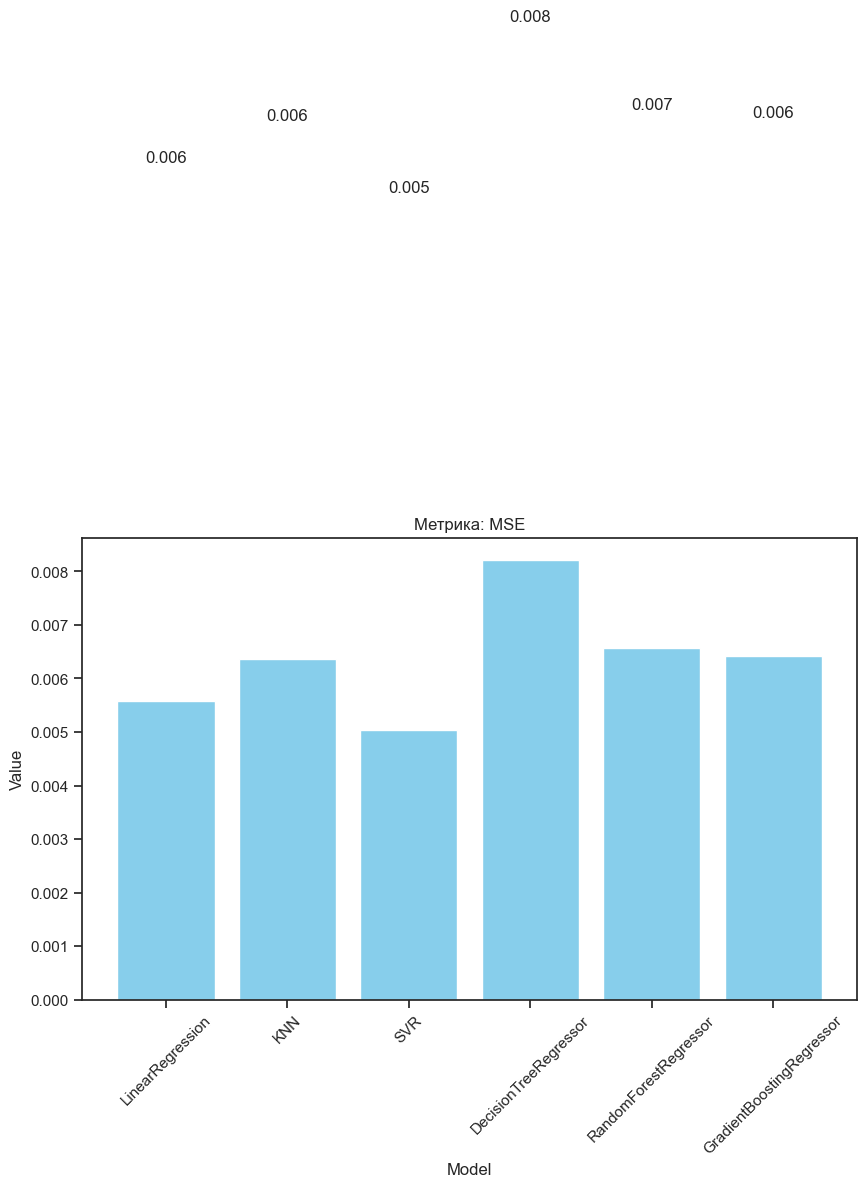

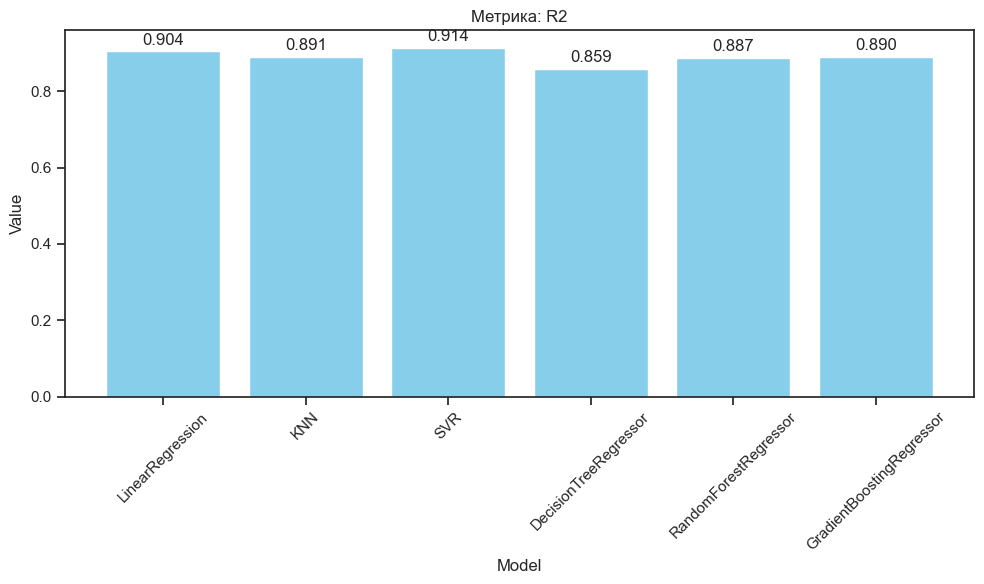

In [37]:
def plot_metric(regrMetricLogger, metric_name):
    # Фильтрация DataFrame для отображения только интересующей метрики
    filtered_df = regrMetricLogger[regrMetricLogger['Metric'] == metric_name][['Model', 'Value']]  # Изменено 'Metric'

    # Создание столбчатой диаграммы
    plt.figure(figsize=(10, 6))
    plt.bar(filtered_df['Model'], filtered_df['Value'], color='skyblue')

    # Добавление подписей к столбцам
    for i, value in enumerate(filtered_df['Value']):
        plt.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

    plt.xlabel('Model')
    plt.ylabel('Value')
    plt.title(f'Метрика: {metric_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Создание DataFrame с метриками для лучших моделей
best_models_metrics = pd.DataFrame(
    {
        "Model": [
            "LinearRegression", 
            "KNN",
            "SVR",
            "DecisionTreeRegressor",
            "RandomForestRegressor",
            "GradientBoostingRegressor",
        ],
        "MAE": [mae_lr, mae_knn, mae_svr, mae_tree, mae_rf, mae_gb],
        "MSE": [mse_lr, mse_knn, mse_svr, mse_tree, mse_rf, mse_gb],
        "R2": [r2_lr,r2_knn, r2_svr, r2_tree, r2_rf, r2_gb],
    }
)
best_models_metrics = best_models_metrics.melt(
    id_vars="Model", var_name="Metric", value_name="Value"
)

# Построение графиков для лучших моделей
metrics = ["MAE", "MSE", "R2"]
for metric in metrics:
    plot_metric(best_models_metrics, metric)

Лучше всего себя показала модель ближайших соседей